## Load necessary modules

In [2]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet.models.resnet import custom_objects
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    #config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())
print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


## Load RetinaNet model

In [4]:
# adjust this to point to your downloaded/trained model
#model_path = os.path.join('..', 'snapshots', 'resnet50_csv_01.h5')

# load retinanet model
model = keras.models.load_model("/Users/haydenbarker/Desktop/keras-retinanet-master/snapshots/resnet50_csv_01.h5", custom_objects=custom_objects)
#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
print("Done")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/models.py:274: UserWarning: Output "nms" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "nms" during training.
  sample_weight_mode=sample_weight_mode)


Done


## Run detection on example

processing time:  3.136728048324585
[23 12 51 40]
2
[ 9 25 37 53]
2


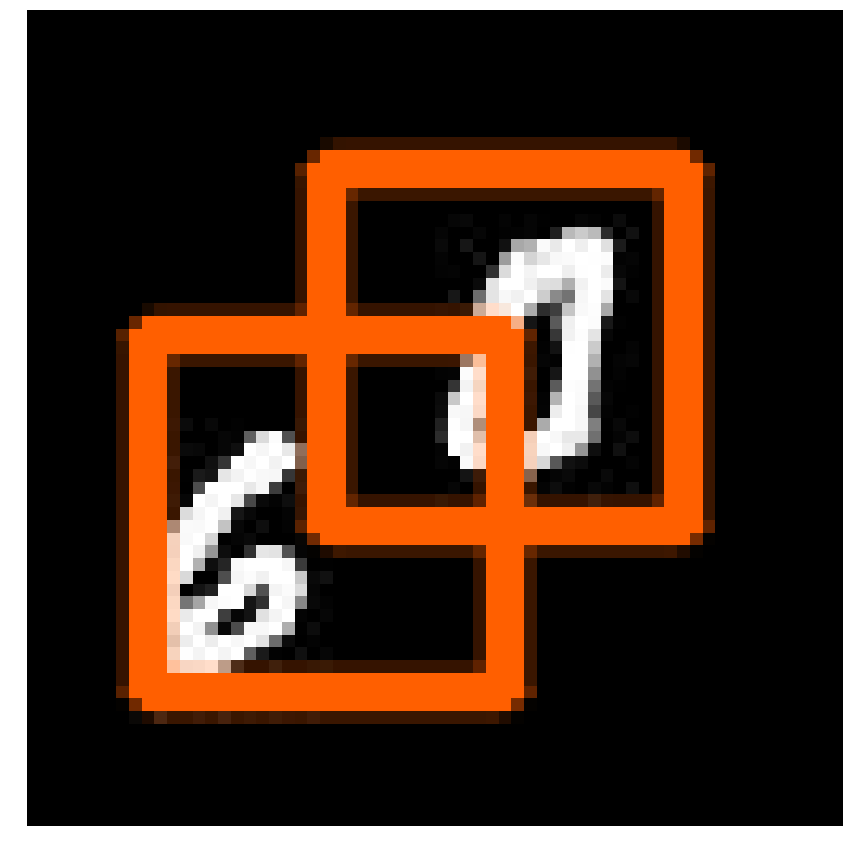

In [44]:
# load image
image = read_image_bgr('/Users/haydenbarker/Desktop/keras-retinanet-master/IMTest/outfile100.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
_, _, detections = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# compute predicted labels and scores
predicted_labels = np.argmax(detections[0, :, 4:], axis=1)
scores = detections[0, np.arange(detections.shape[1]), 4 + predicted_labels]

# correct for image scale
detections[0, :, :4] /= scale

# visualize detections
ind = np.argpartition(scores, -2)[-2:]



#for idx, (label, score) in enumerate(zip(predicted_labels, scores)):
    
    #if score < 0.18:
        #continue

for index in ind:
        
    color = label_color(predicted_labels[index])

    b = detections[0, index, :4].astype(int)
    print(b)
    draw_box(draw, b, color=color)
    
    #caption = "{} {:.3f}".format(labels_to_names[predicted_labels[index]], scores[index])
    #draw_caption(draw, b, caption)
    draw_caption(draw, b, "")
    print(labels_to_names[predicted_labels[index]])
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()